# A quick attempt without log scaling, miserable again.
__I need help!!!__
- Please there has to be a better result in a timely manner. So that I can use it as a project
- I did try many more configurations and cannot get this to work

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

NameError: name 'warnings' is not defined

In [2]:
df_spend = pd.read_csv("FE/df_Spend_raw.csv")
df_spend.head()

,ID,cc_cons,cc_cons_quantileTransformed,card_lim,trading,CDs,LifeInsurance,emi_active,sum_cc_cons,sum_dc_cons,sum_cc_count,sum_dc_count,sum_debit_amount,sum_credit_amount,sum_debit_count,sum_credit_count,MAX_credit_amount,Neg_GeneralInsurance,Pos_GeneralInsurance,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,FE_isSaving,FE_isFemale,FE_age_noOutlierErrors,FE_region_id
0,12554,20014.0,0.747450,430000,593.20,1244.14,787.0,1674.09,51472.40,41474.00,38.0,109,127498.30,229730.13,129.0,10,50836.0,0.0,6885.0,MEDIUM,15.0,1.0,708.0,0.0,17.0,0.0,0.0,35.0,700.0-710.0
1,17645,10173.0,0.377158,127500,213557.15,172678.56,90525.0,13043.34,43830.62,2138.00,21.0,55,146651.37,236061.37,176.0,59,80750.0,0.0,1500.0,HIGH,15.0,6.0,123.0,0.0,14.0,0.0,0.0,35.0,123.0-233.0
2,7604,16095.0,0.602173,199999,165907.57,470000.00,25524.0,25375.27,31599.62,11825.11,177.0,85,111909.25,231141.00,155.0,18,38466.0,0.0,3735.0,MEDIUM,24.5,1.0,802.0,1.0,3.0,0.0,0.0,55.0,802.0-805.0
3,1590,7707.0,0.284819,155000,81872.65,223379.40,48500.0,3544.33,60620.38,24024.44,104.0,12,125277.65,368067.84,164.0,74,52732.0,4679.0,0.0,MEDIUM,4.5,6.0,867.0,1.0,4.0,0.0,1.0,29.0,867.0-867.0
4,16556,96408.0,0.814454,297000,568.80,385000.00,183999.0,12780.44,13926.40,15674.22,196.0,138,180347.52,169323.03,128.0,68,32044.0,0.0,6916.0,MEDIUM,12.6,4.0,802.0,1.0,7.0,0.0,0.0,34.0,802.0-805.0


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_spend['Income'] = le.fit_transform(df_spend['Income'])
df_spend['FE_region_id'] = le.fit_transform(df_spend['FE_region_id'])
df_spend['GeneralInsurance'] = df_spend['Pos_GeneralInsurance'] - df_spend['Neg_GeneralInsurance']
cc_cons_series = df_spend['cc_cons']
df_spend.drop(columns = ['cc_cons_quantileTransformed','Neg_GeneralInsurance','Pos_GeneralInsurance','region_code','ID', 'cc_cons'], inplace=True)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().set_output(transform='pandas')
df_spend_scaled = ss.fit_transform(df_spend)


In [5]:
pca = PCA(n_components = 8)
pca.fit(df_spend_scaled)

PCA(n_components=8)

In [6]:
len_components = len(pca.components_)

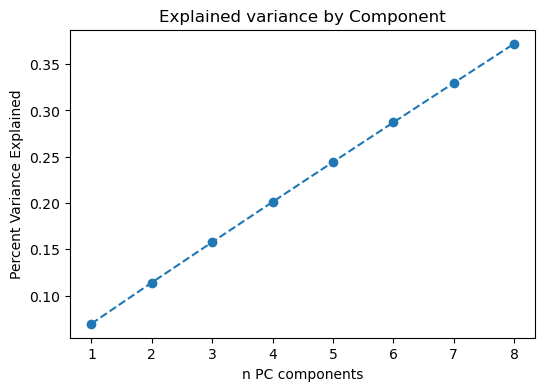

In [7]:
plt.figure(figsize=(6,4))
plt.plot(range(1,len_components+1), pca.explained_variance_ratio_[:len_components].cumsum(), marker="o", linestyle="--")
plt.title("Explained variance by Component")
plt.xlabel("n PC components")
plt.ylabel("Percent Variance Explained")
plt.show()

In [8]:
PCs =[]
for i in range(1,len_components+1):
    PCs.append(f'PC{i}')

In [9]:
pca_components = pca.transform(df_spend_scaled)
pca_components.shape

(14463, 8)

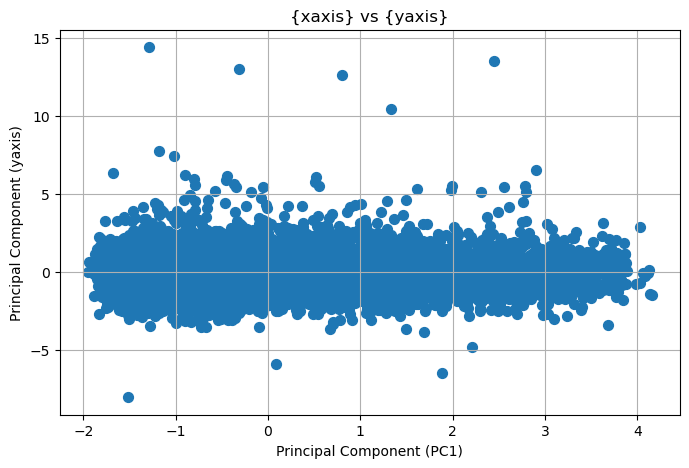

In [10]:
pca_df = pd.DataFrame(pca_components, columns=PCs)
xaxis = 'PC1'
yaxis = 'PC2'
plt.figure(figsize=(8, 5))
plt.scatter(pca_df[xaxis], pca_df[yaxis], s=50)
plt.xlabel(f'Principal Component ({xaxis})')
plt.ylabel(f'Principal Component (yaxis)')
plt.title('{xaxis} vs {yaxis}')
plt.grid(True)
plt.show()

In [11]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.206870,-1.300052,0.448299,-0.803014,1.142837,0.523035,-0.230889,0.144821
1,-0.270459,0.214592,-0.366943,0.774362,1.181512,-0.052686,1.288222,0.274256
2,1.520861,-0.111511,0.200831,-0.518021,-1.202749,-0.162608,-1.363145,0.907066
3,-1.413521,0.901125,-2.080887,0.636356,-0.836972,-0.491650,0.072089,0.837692
4,-0.515888,-0.568311,1.087817,0.633214,-0.719465,-0.884164,-1.049272,-0.134882


In [12]:
df_spend_scaled_PCA = pd.DataFrame(data=pca.components_,
                                  columns=df_spend_scaled.columns.values,
                                  index = PCs)
df_spend_scaled

,card_lim,trading,CDs,LifeInsurance,emi_active,sum_cc_cons,sum_dc_cons,sum_cc_count,sum_dc_count,sum_debit_amount,sum_credit_amount,sum_debit_count,sum_credit_count,MAX_credit_amount,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,FE_isSaving,FE_isFemale,FE_age_noOutlierErrors,FE_region_id,GeneralInsurance
0,0.850576,-0.200664,-0.574180,-0.496213,-0.118571,0.121203,0.678882,-0.658533,1.223247,-0.383459,-0.042917,0.113139,-0.969182,-0.185998,0.688176,0.254905,-1.573730,-1.595260,1.081620,-0.424353,-0.398615,-0.628819,0.531354,0.455584
1,-0.834406,-0.131663,-0.148169,0.533440,-0.023607,-0.063125,-0.759803,-0.801607,-0.162954,-0.294214,-0.022214,0.864852,0.462882,-0.086579,-2.448630,0.254905,0.171199,-1.595260,0.535676,-0.424353,-0.398615,-0.628819,-1.719133,-0.273499
2,-0.430573,-0.147101,0.590669,-0.212381,0.079398,-0.358151,-0.405504,0.511305,0.607158,-0.456097,-0.038303,0.528980,-0.735375,-0.227110,0.688176,1.203283,-1.573730,0.626857,-1.466117,-0.424353,-0.398615,1.011165,0.971666,0.029101
3,-0.681226,-0.174329,-0.022178,0.051245,-0.102949,0.341862,0.040677,-0.103070,-1.266780,-0.393806,0.409433,0.672925,0.901269,-0.179697,0.688176,-0.793302,0.171199,0.626857,-1.284136,-0.424353,2.508684,-1.120814,1.265208,-1.110081
4,0.109741,-0.200672,0.379446,1.605960,-0.025803,-0.784449,-0.264726,0.671211,1.967688,-0.137204,-0.240442,0.097145,0.725914,-0.248454,0.688176,0.015315,-0.526773,0.626857,-0.738192,-0.424353,-0.398615,-0.710818,0.971666,0.459781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14458,0.694611,-0.175979,-0.429897,-0.497866,-0.094659,0.058507,0.924043,-0.094654,-1.061417,0.497753,-0.334713,-0.606585,-0.530795,-0.236210,0.688176,-1.102772,-0.177787,0.626857,0.899639,-0.424353,-0.398615,-1.284813,-0.838507,-0.158281
14459,1.351893,-0.140530,-0.517632,-0.319193,0.527031,-0.533526,-0.282112,-0.624868,1.710984,1.579915,-0.475450,-0.430653,-0.764601,-0.079596,-0.880227,0.075213,1.218157,0.626857,1.627564,-0.424353,2.508684,0.847166,0.286736,-0.344308
14460,1.084524,-0.192811,-0.028091,-0.363689,-0.092777,0.040554,-0.298177,-0.650117,-1.318121,-0.481359,-0.438321,-0.654567,-0.764601,0.318519,0.688176,-1.002943,1.218157,0.626857,-1.648099,-0.424353,-0.398615,0.109173,-0.300348,-1.327030
14461,-1.299516,-0.142336,0.051428,-0.218394,-0.108520,0.516807,-0.719333,0.208326,-0.804713,-0.265438,0.488173,-0.638573,0.141398,-0.190289,0.688176,-0.903114,1.218157,0.626857,-0.556211,-0.424353,-0.398615,-0.464821,-0.691737,0.905760


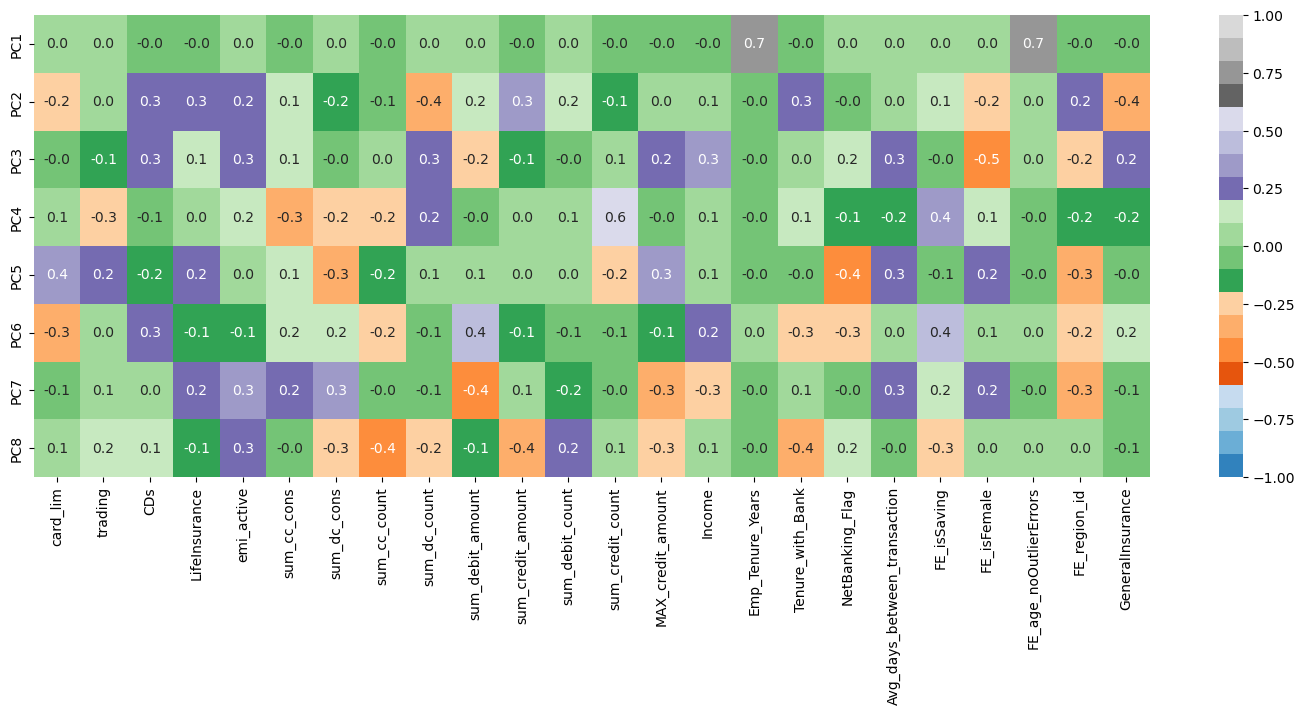

In [38]:
plt.figure(figsize=(18,6))
sns.heatmap(df_spend_scaled_PCA,vmin=-1,vmax=1, cmap="tab20c", annot=True,fmt=".1f", annot_kws = {"size":10})
plt.show()

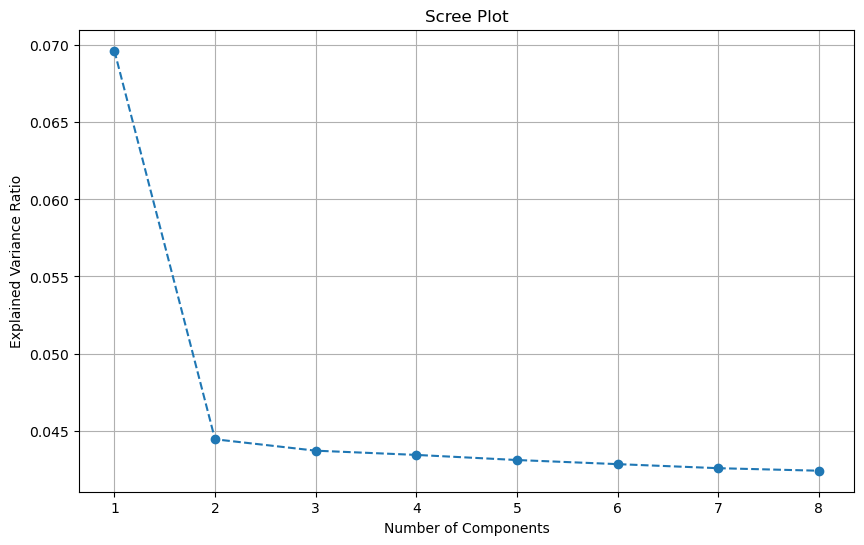

In [14]:
import numpy as np
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [15]:
explained_variance_ratio

array([0.06964857, 0.04443527, 0.04369643, 0.04342145, 0.04308974,
       0.04282314, 0.04255991, 0.04239547])

In [16]:
scores_pca = pca.transform(df_spend_scaled)

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,40):
    Kmeans = KMeans(n_clusters = i, init='k-means++',random_state=42)
    Kmeans.fit(scores_pca)
    wcss.append(Kmeans.inertia_)

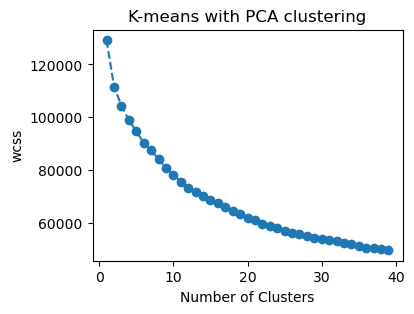

In [18]:
plt.figure(figsize=(4,3))
plt.plot(range(1,40), wcss, marker="o", linestyle="--")
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('K-means with PCA clustering')
plt.show()

In [19]:
Kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [20]:
Kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [21]:
scores_pca_df = pd.DataFrame(scores_pca)
colnames = []
for i in scores_pca_df.columns:
    colnames.append(f'PC{i+1}')
scores_pca_df.columns = colnames
scores_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.206870,-1.300052,0.448299,-0.803014,1.142837,0.523035,-0.230889,0.144821
1,-0.270459,0.214592,-0.366943,0.774362,1.181512,-0.052686,1.288222,0.274256
2,1.520861,-0.111511,0.200831,-0.518021,-1.202749,-0.162608,-1.363145,0.907066
3,-1.413521,0.901125,-2.080887,0.636356,-0.836972,-0.491650,0.072089,0.837692
4,-0.515888,-0.568311,1.087817,0.633214,-0.719465,-0.884164,-1.049272,-0.134882
...,...,...,...,...,...,...,...,...
14458,-1.654036,-0.360552,0.224196,-0.964360,0.135527,0.350398,0.322075,0.295951
14459,0.857269,-0.884482,-1.018718,0.413424,1.562684,-0.690343,0.330675,-0.129524
14460,-0.647169,0.790521,-0.418135,0.090137,0.027510,-0.928166,-0.542552,0.640943
14461,-1.075464,0.540045,0.623561,-0.270595,-0.685900,0.123391,-0.054466,-0.283964


In [22]:
df_spend_scaled_pca_Kmeans = pd.concat([df_spend_scaled.reset_index(drop=True), scores_pca_df], axis=1).reset_index()
df_spend_scaled_pca_Kmeans['Segment_PCA_Kmeans'] = Kmeans_pca.labels_

df_spend_scaled_pca_Kmeans_freq = df_spend_scaled_pca_Kmeans.groupby(['Segment_PCA_Kmeans']).mean()
df_spend_scaled_pca_Kmeans_freq

,index,card_lim,trading,CDs,LifeInsurance,emi_active,sum_cc_cons,sum_dc_cons,sum_cc_count,sum_dc_count,sum_debit_amount,sum_credit_amount,sum_debit_count,sum_credit_count,MAX_credit_amount,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,FE_isSaving,FE_isFemale,FE_age_noOutlierErrors,FE_region_id,GeneralInsurance,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Segment_PCA_Kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7218.359313,0.060347,-0.039305,-0.076417,-0.032347,-0.035278,-0.096753,-0.022433,-0.007611,0.005467,-0.031576,-0.026967,0.035393,-0.042108,-0.030041,-0.035147,1.380274,-0.034402,0.038429,-0.005744,-0.129113,0.014419,1.345326,0.029012,-0.032127,1.926838,-0.068182,-0.053767,-0.033275,-0.049615,-0.120292,-0.079025,0.067762
1,7236.977879,-0.037641,-0.087181,-0.120974,-0.145266,-0.052661,-0.210999,-0.114378,0.086415,-0.285869,-0.047700,0.001993,0.163768,0.047984,-0.058302,-0.179570,-0.470566,0.077143,0.263567,-0.391998,-0.352232,-0.039361,-0.500744,0.528754,-0.277841,-0.696824,0.213465,-0.457763,-0.046908,-0.446291,-0.528147,-0.360357,0.251158
2,7275.236025,-0.211420,0.401725,0.567514,0.473583,0.253933,0.735663,-0.036836,-0.137530,-0.405000,-0.066884,-0.029336,0.028203,-0.437827,-0.034227,0.160040,-0.359505,-0.053923,-0.078029,0.576045,-0.255328,-0.152256,-0.291400,-0.169422,-0.103502,-0.466245,0.717326,0.466212,-0.804744,0.476884,0.287660,0.532442,0.393631
3,7246.934154,0.356622,-0.081134,-0.168646,-0.118857,-0.053585,-0.125085,-0.014349,0.056702,0.684126,-0.129679,-0.139492,-0.185330,0.135800,0.180963,0.148336,-0.423505,-0.141344,-0.115080,0.166570,-0.295805,-0.008977,-0.428989,-0.471881,0.541717,-0.593699,-0.931660,0.525962,0.095920,0.411799,-0.102435,-0.125590,-0.160635
4,7166.354726,-0.320623,-0.094798,-0.023494,-0.016569,-0.044352,-0.068098,0.322952,-0.087352,-0.018804,0.413538,0.281404,-0.132204,0.262198,-0.069554,0.006974,-0.280482,0.176755,-0.318372,-0.118822,1.627414,0.237808,-0.232939,-0.185730,-0.098606,-0.349645,0.282236,-0.326767,0.904673,-0.197124,1.059142,0.424054,-0.802416


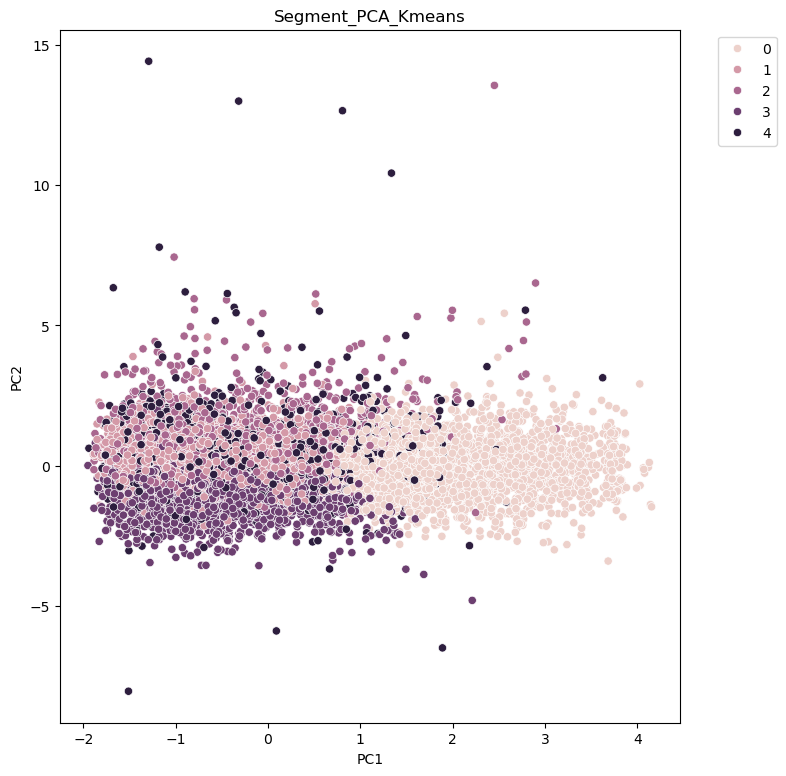

In [23]:
xaxis = 'PC1'
yaxis = 'PC2'
plt.figure(figsize=(8,9))
sns.scatterplot(data =df_spend_scaled_pca_Kmeans, x=xaxis, y=yaxis, hue='Segment_PCA_Kmeans')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Segment_PCA_Kmeans')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [56]:
# names of models
models=[ ('linearRegression',LinearRegression())
        ,('ElasticNet',ElasticNet())
        ,('RF',RandomForestRegressor())
        ,('ETR',ExtraTreesRegressor())
        ,('GBM',GradientBoostingRegressor())
        ,('MLP',MLPRegressor())
]

In [57]:
def model_selection_function(x,y,cross_folds,model, segment, y_treatment="none"):
  scores=[]
  names=[]
  for i, j in model:
    ## print(f"i = {i} and j={j}")
    cv_scores=cross_val_score(j,x,y,cv=cross_folds,n_jobs=-1)
    scores.append(cv_scores)
    names.append(i)
  for k in range(len(scores)):
    print(f'model {names[k]}, score {scores[k].mean()}, segment={segment}, y_treatment = {y_treatment}')
  return

In [50]:
df_spend_scaled_pca_Kmeans.drop(columns=['index'])
df_spend_scaled_pca_Kmeans['cc_cons'] = cc_cons_series
segments = df_spend_scaled_pca_Kmeans['Segment_PCA_Kmeans'].unique()
df_spend_scaled_pca_Kmeans

,index,card_lim,trading,CDs,LifeInsurance,emi_active,sum_cc_cons,sum_dc_cons,sum_cc_count,sum_dc_count,sum_debit_amount,sum_credit_amount,sum_debit_count,sum_credit_count,MAX_credit_amount,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,FE_isSaving,FE_isFemale,FE_age_noOutlierErrors,FE_region_id,GeneralInsurance,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Segment_PCA_Kmeans,cc_cons
0,0,0.850576,-0.200664,-0.574180,-0.496213,-0.118571,0.121203,0.678882,-0.658533,1.223247,-0.383459,-0.042917,0.113139,-0.969182,-0.185998,0.688176,0.254905,-1.573730,-1.595260,1.081620,-0.424353,-0.398615,-0.628819,0.531354,0.455584,-0.206870,-1.300052,0.448299,-0.803014,1.142837,0.523035,-0.230889,0.144821,3,20014.0
1,1,-0.834406,-0.131663,-0.148169,0.533440,-0.023607,-0.063125,-0.759803,-0.801607,-0.162954,-0.294214,-0.022214,0.864852,0.462882,-0.086579,-2.448630,0.254905,0.171199,-1.595260,0.535676,-0.424353,-0.398615,-0.628819,-1.719133,-0.273499,-0.270459,0.214592,-0.366943,0.774362,1.181512,-0.052686,1.288222,0.274256,2,10173.0
2,2,-0.430573,-0.147101,0.590669,-0.212381,0.079398,-0.358151,-0.405504,0.511305,0.607158,-0.456097,-0.038303,0.528980,-0.735375,-0.227110,0.688176,1.203283,-1.573730,0.626857,-1.466117,-0.424353,-0.398615,1.011165,0.971666,0.029101,1.520861,-0.111511,0.200831,-0.518021,-1.202749,-0.162608,-1.363145,0.907066,0,16095.0
3,3,-0.681226,-0.174329,-0.022178,0.051245,-0.102949,0.341862,0.040677,-0.103070,-1.266780,-0.393806,0.409433,0.672925,0.901269,-0.179697,0.688176,-0.793302,0.171199,0.626857,-1.284136,-0.424353,2.508684,-1.120814,1.265208,-1.110081,-1.413521,0.901125,-2.080887,0.636356,-0.836972,-0.491650,0.072089,0.837692,1,7707.0
4,4,0.109741,-0.200672,0.379446,1.605960,-0.025803,-0.784449,-0.264726,0.671211,1.967688,-0.137204,-0.240442,0.097145,0.725914,-0.248454,0.688176,0.015315,-0.526773,0.626857,-0.738192,-0.424353,-0.398615,-0.710818,0.971666,0.459781,-0.515888,-0.568311,1.087817,0.633214,-0.719465,-0.884164,-1.049272,-0.134882,3,96408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14458,14458,0.694611,-0.175979,-0.429897,-0.497866,-0.094659,0.058507,0.924043,-0.094654,-1.061417,0.497753,-0.334713,-0.606585,-0.530795,-0.236210,0.688176,-1.102772,-0.177787,0.626857,0.899639,-0.424353,-0.398615,-1.284813,-0.838507,-0.158281,-1.654036,-0.360552,0.224196,-0.964360,0.135527,0.350398,0.322075,0.295951,2,1721.0
14459,14459,1.351893,-0.140530,-0.517632,-0.319193,0.527031,-0.533526,-0.282112,-0.624868,1.710984,1.579915,-0.475450,-0.430653,-0.764601,-0.079596,-0.880227,0.075213,1.218157,0.626857,1.627564,-0.424353,2.508684,0.847166,0.286736,-0.344308,0.857269,-0.884482,-1.018718,0.413424,1.562684,-0.690343,0.330675,-0.129524,0,4263.0
14460,14460,1.084524,-0.192811,-0.028091,-0.363689,-0.092777,0.040554,-0.298177,-0.650117,-1.318121,-0.481359,-0.438321,-0.654567,-0.764601,0.318519,0.688176,-1.002943,1.218157,0.626857,-1.648099,-0.424353,-0.398615,0.109173,-0.300348,-1.327030,-0.647169,0.790521,-0.418135,0.090137,0.027510,-0.928166,-0.542552,0.640943,1,11019.0
14461,14461,-1.299516,-0.142336,0.051428,-0.218394,-0.108520,0.516807,-0.719333,0.208326,-0.804713,-0.265438,0.488173,-0.638573,0.141398,-0.190289,0.688176,-0.903114,1.218157,0.626857,-0.556211,-0.424353,-0.398615,-0.464821,-0.691737,0.905760,-1.075464,0.540045,0.623561,-0.270595,-0.685900,0.123391,-0.054466,-0.283964,1,404227.0


In [59]:

for i in segments:
    df = df_spend_scaled_pca_Kmeans[df_spend_scaled_pca_Kmeans['Segment_PCA_Kmeans']==i]
    X=df.drop(columns=['index','cc_cons','Segment_PCA_Kmeans'])
    y=df['cc_cons']
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22222)
    ## do I need to define random_state here?
    
    
    
    model_selection_function(X_train,y_train,5,models, i)
    model_selection_function(X_train,np.sqrt(y_train),5,models, i, "Y square root")
    model_selection_function(X_train,np.cbrt(y_train),5,models, i, "Y cuberoot")
    model_selection_function(X_train,np.log(y_train+1),5,models, i, "Y log")

KeyboardInterrupt: 

In [55]:
X_train

,card_lim,trading,CDs,LifeInsurance,emi_active,sum_cc_cons,sum_dc_cons,sum_cc_count,sum_dc_count,sum_debit_amount,sum_credit_amount,sum_debit_count,sum_credit_count,MAX_credit_amount,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,FE_isSaving,FE_isFemale,FE_age_noOutlierErrors,FE_region_id,GeneralInsurance,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Segment_PCA_Kmeans
13878,-1.355218,1.681600,-0.577040,-0.492656,0.346799,-0.620883,-0.399693,-0.852103,-0.085942,-0.521136,0.621300,2.432252,-1.086085,-0.093425,0.688176,-0.723421,0.171199,-1.595260,1.081620,2.356531,-0.398615,0.273172,-1.572362,1.301779,-0.273137,0.590735,0.662252,0.575966,1.492889,2.136187,0.789334,-0.094790,4
10414,-1.215963,-0.199112,-0.152367,-0.464281,-0.131426,-0.401193,0.424970,-0.582788,-1.420802,-0.123513,-0.427676,0.305066,-0.150860,-0.236429,0.688176,-0.483831,0.520185,0.626857,-1.466117,2.356531,-0.398615,-0.300822,1.656597,0.455584,-0.613728,1.079764,-0.660212,0.609128,-2.259485,1.244623,-0.577706,-0.023364,4
14139,-0.508550,-0.196586,-0.564248,-0.472646,0.078441,-0.910501,0.469567,0.065252,1.146236,2.714380,11.410236,0.401029,0.725914,0.017157,0.688176,-0.523763,-1.224744,0.626857,-0.374230,-0.424353,-0.398615,-1.120814,0.727048,-1.108050,-1.141258,3.873694,-2.134734,1.070234,-0.538138,-0.618979,-1.267223,-4.199917,4
10302,-0.519690,0.140455,-0.167250,-0.497464,-0.116161,-0.874167,-0.728240,1.193010,-1.164098,-0.049965,-0.032117,-0.910469,1.631914,-0.018700,-0.880227,-0.224275,-1.573730,0.626857,-0.556211,2.356531,-0.398615,-0.464821,0.237812,-0.273499,-0.520496,-0.172146,-0.755213,1.307329,-1.607478,0.541912,-0.038600,-0.060896,4
13963,-0.416642,-0.105787,0.590669,-0.492656,-0.104015,3.273033,-0.419662,-0.305057,1.479951,1.715648,0.123952,-0.190744,2.479462,-0.128389,0.688176,-0.803285,-0.177787,-1.595260,-1.284136,-0.424353,-0.398615,-0.956816,0.971666,0.263193,-1.374854,0.137699,0.282113,0.625576,0.033474,1.636802,-1.368027,-0.302761,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,-0.876182,-0.178075,-0.548017,-0.228789,-0.122446,2.075718,-0.141414,-0.338721,-0.291305,3.282945,4.132224,-0.542610,-0.852279,-0.215142,0.688176,-0.483831,1.218157,0.626857,-0.556211,2.356531,2.508684,-0.300822,0.922743,0.981579,-0.523781,2.293812,-2.428100,0.114298,0.194272,2.433874,-0.083894,-2.867667,4
7775,-1.282806,0.043468,-0.500155,0.176473,-0.117632,0.076778,0.175115,-0.439714,0.530147,0.743011,-0.225903,-1.278328,0.901269,-0.231984,-0.880227,0.514461,0.171199,0.626857,1.445583,-0.424353,2.508684,-0.054825,0.727048,-0.453975,0.364116,-0.542484,-1.346380,0.212037,-0.113690,0.140196,1.143669,-0.074611,4
8933,0.087460,-0.177201,-0.204525,-0.108817,-0.038617,-0.214132,8.148762,-0.002077,-0.239965,-0.726969,1.783784,1.136748,-0.647698,-0.198541,0.688176,-0.543729,0.520185,-1.595260,1.445583,-0.424353,-0.398615,-1.038815,-0.104653,-0.356629,-1.076991,-0.437078,-0.029029,-2.052384,-1.510068,1.039366,3.222908,-3.025358,4
13831,-0.023944,-0.200589,-0.303489,0.292119,-0.111733,0.953360,-0.425001,0.183077,-1.343791,-0.143846,-0.449123,-0.526616,0.375205,-0.177643,0.688176,-0.593643,-0.526773,-1.595260,-0.738192,2.356531,-0.398615,-0.792818,-1.376667,1.835898,-1.054046,-0.485998,0.415643,0.699209,0.663083,2.333502,0.534752,-0.579675,4
